# Lecture 12 (PS10). Metrics and Model Selection for Classification. Logistic Regression. Support Vector Machine (SVM)

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

Denote margin by $M^{(i)} = y^{(i)}(w_0+\langle w,x^{(i)}\rangle).$ We can map it into the interval $[0, 1]$ by the following transform (logistic function):
$$
p=\sigma(M) = \frac{e^{M}}{1+e^{M}}=\frac{1}{1+e^{-M}}\quad\colon \mathbb{R}\to [0,\ 1].
$$
It can be interpretate as probability. The inverse transform
$$
M = \log\frac{p}{1-p}  \quad\colon [0,\ 1]\to \mathbb{R}
$$
is called *logit.*

Linear Regression returns values from $(-\infty,\ +\infty)$. The tipical threshold is $0$. Logistic Regression returns values from $[0,\ 1].$ The tipical threshhold is $0.5$.

Loss in case of linear classifier is

$$
\text{Loss}(a(x^{(i)}),\ y^{(i)}) = [sign(w_0+\langle w,x^{(i)}\rangle) = y^{(i)}] = [sign(M^{(i)})  NOTEQUAL!=  y^{(i)}].
$$

Loss in case of logistic regression is derived from the Maximum Likelihood Principle

$$
\text{Log-Loss}(a(x^{(i)}),\ y^{(i)}) = \log (1+e^{-M^{(i)}})
$$

For SVM
$$
\text{Hinge-Loss}(a(x^{(i)}),\ y^{(i)}) = \max \{0,\ 1-M^{(i)}\}
$$

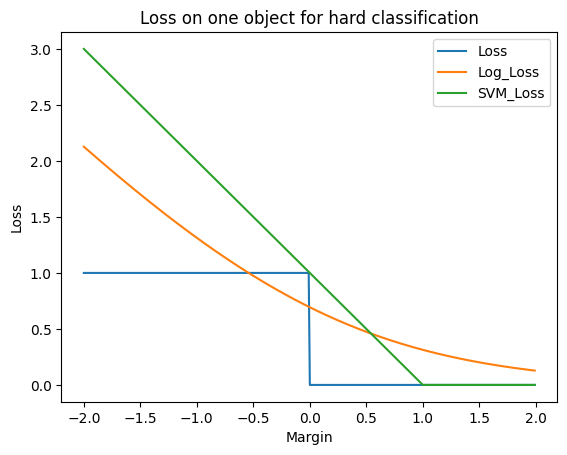

In [2]:
x = np.arange(-2,2,0.01).tolist()
Los = list(map(lambda x: 0 if x>0 else 1, x))
Log_Los = list(map(lambda x: np.log(1+np.exp(-x)), x))
SVM_Los = list(map(lambda x: np.max([0, 1-x]), x))
plt.plot(x,Los, label='Loss')
plt.plot(x,Log_Los, label='Log_Loss')
plt.plot(x,SVM_Los, label='SVM_Loss')
plt.title('Loss on one object for hard classification')
plt.xlabel('Margin')
plt.ylabel('Loss')
plt.legend()

In [4]:
from sklearn.datasets import make_blobs, make_moons, make_circles

In [5]:
X, y = make_moons(noise=0.1)

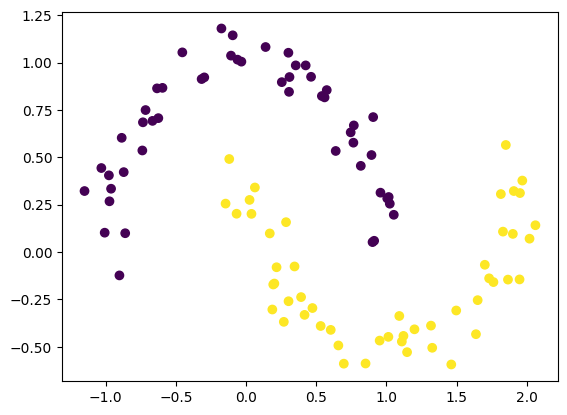

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [7]:
from sklearn.linear_model import LogisticRegression
clf_LogReg = LogisticRegression()
clf_LogReg.fit(X,y)

LogisticRegression()

The equation of the separator is
$$
w_0 + w_1 x + w_2 y =0,
$$
where $w_0 = model.intercept_$ and $[w_1, w_2] = model.coef_$

For visualisation we can solve it for $y$:
$$
y = -(w_0 + w_1 x)/w_2.
$$

In [8]:
clf_LogReg.intercept_, clf_LogReg.coef_

(array([0.23942853]), array([[ 1.06916189, -3.14802466]]))

In [9]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

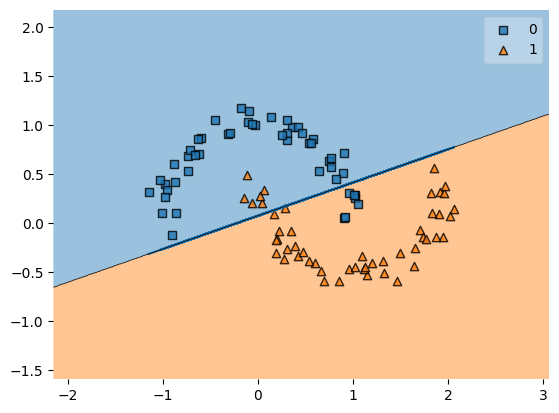

In [10]:
#plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(X[:,0], -(clf_LogReg.intercept_+clf_LogReg.coef_[0][0]*X[:,0])/clf_LogReg.coef_[0][1])
plot_decision_regions(X,y,clf_LogReg)

**Example 1.** Plot confusion matrix and calculate precision and recall for the threshold $th = 0.5$ and $th = 0.4.$

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

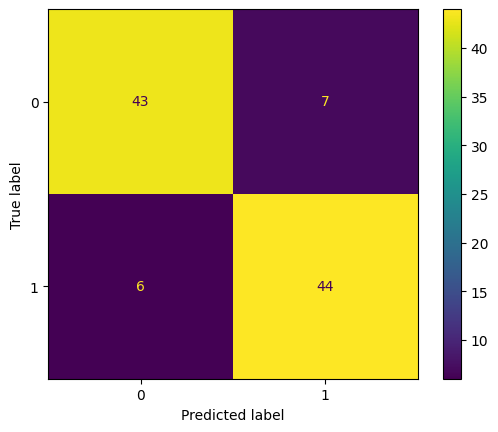

In [18]:
ConfusionMatrixDisplay.from_predictions(y, clf_LogReg.predict(X))

In [17]:
43/(43+7), 44/(44+6)

(0.86, 0.88)

In [19]:
precision_score(y, clf_LogReg.predict(X)), recall_score(y, clf_LogReg.predict(X))

(0.8627450980392157, 0.88)

In [21]:
y_pred_proba = clf_LogReg.predict_proba(X)[:,1]

In [22]:
clf_LogReg.classes_

array([0, 1])

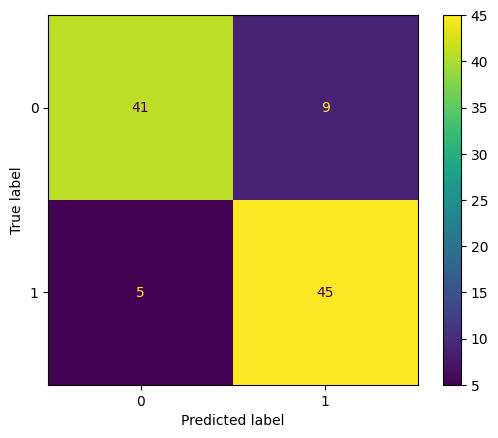

In [26]:
ConfusionMatrixDisplay.from_predictions(y, (y_pred_proba > 0.4).astype(int))

In [27]:
45/(45+8), 45/(45+5)

(0.8490566037735849, 0.9)

In [28]:
precision_score(y, (y_pred_proba > 0.4).astype(int)), recall_score(y, (y_pred_proba > 0.4).astype(int))

(0.8333333333333334, 0.9)

**Example 2.** Plot precision, recall, and $f_1$-score as functions of threshhold.

In [29]:
precision, recall, thresh = precision_recall_curve(y, y_pred_proba)
f1 =  2 * (precision * recall) / (precision + recall)

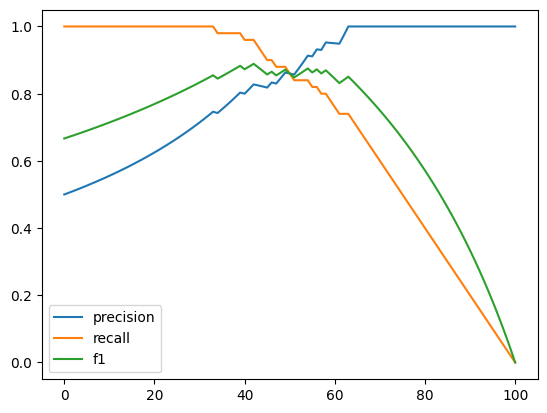

In [30]:
plt.plot(precision, label='precision')
plt.plot(recall, label='recall')
plt.plot(f1, label='f1')
plt.legend()

If we want to maximize both precision and recall, we can use $F$-measure
$$
F_{\beta} = (1+\beta) \frac{precision\times recall}{\beta (precision+recall)}
$$
\
$$
F_1 =  \frac{2}{\dfrac{1}{precision}+\dfrac{1}{recall}} = 2\frac{precision\times recall}{precision+recall}
$$
**Find maximum f1**

In [31]:
np.argmax(f1)

42

In [32]:
thresh[np.argmax(f1)]

0.32725079452610617

**Example 3.** Plot PR and ROC curves

# Precision - Recall Curve
## Comment: we could do model selection using only accuracy or f1 measure, but my goal is to make you familiar with area under the curve (AUC) measure of quality.

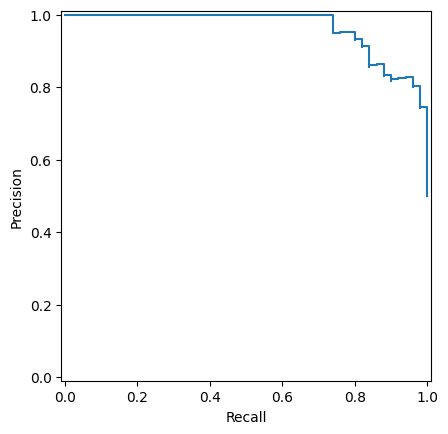

In [33]:
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

# ROC curve


$$
TPR = \frac{TP}{TP+FN}
$$

$$
FPR = \frac{FP}{FP+TN}
$$

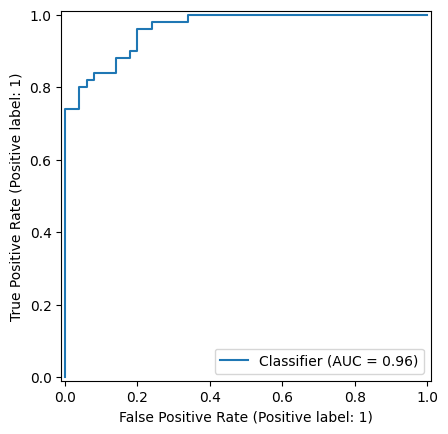

In [34]:
RocCurveDisplay.from_predictions(y, y_pred_proba)

# Nonlinear features

You can use the following model
$$
a(x) = w_0 + w_1 \phi_1(x) + w_2\phi_2(x)+\ldots+w_K \phi_K(x).
$$

For example,
$$
a(x) = w_0 + w_1 x^2 + w_2\sin x.
$$

##Custom Transform

In [35]:
class MyTransform:
  def fit(self, X, y=None, sample_weight=None):
    #self.col = 3
    self.X = X
    return self

  def transform(self, X, y=None, sample_weight=None):
    return np.hstack([X, X**2, (X[:,0]*X[:,1]).reshape(-1,1)])
    #return np.hstack([np.exp(-((X-self.X[j,:])**2).dot(np.array([[1],[1]]))) for j in range(len(self.X))]) #np.hstack((X, X[:,self.col].reshape(-1,1)**(2)))

  def __str__(self):
    return "my_transform()"

  def __repr__(self):
    return "my_transform()"

In [36]:
my_transform = MyTransform()
my_transform.fit(X)
print(X[0])
print(my_transform.transform(X)[0])

[0.35427672 0.98502666]
[0.35427672 0.98502666 0.12551199 0.97027751 0.34897201]


In [37]:
from sklearn.pipeline import Pipeline

In [39]:
pipe = Pipeline([('my_transformer', MyTransform()), ('classifier', LogisticRegression())])

In [40]:
pipe.fit(X,y)

Pipeline(steps=[('my_transformer', my_transform()),
                ('classifier', LogisticRegression())])

<Axes: >

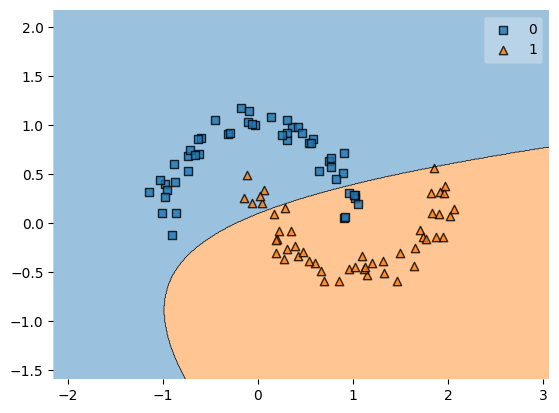

In [41]:
plot_decision_regions(X,y,pipe)

##Polynomial transform

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(3) #creates (1, x1, x2, x1^2, x1*x2, x2^2, x1^3,...)

In [44]:
poly.fit_transform(X)[0]

array([1.        , 0.35427672, 0.98502666, 0.12551199, 0.34897201,
       0.97027751, 0.04446598, 0.12363266, 0.34374673, 0.95574921])

In [45]:
pipe1 = Pipeline([('poly', PolynomialFeatures(3)), ('classifier', LogisticRegression())])

In [46]:
pipe1.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('classifier', LogisticRegression())])

<Axes: >

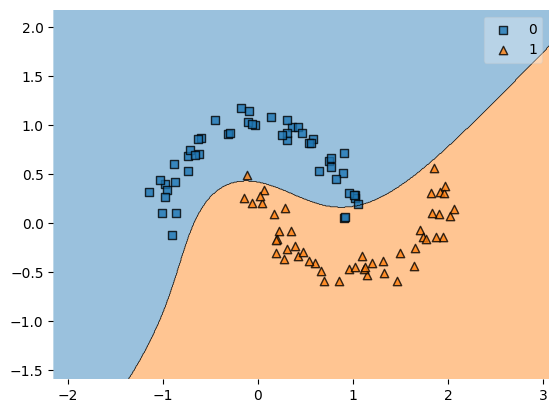

In [47]:
plot_decision_regions(X,y,pipe1)

#Let's try SVM classifier

**Problem 1. [1pt]** Create [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) object, train on $X$ and $y$ and report ROC-AUC. Plot decision boundary.

In [51]:
from sklearn.svm import SVC
svc = SVC().fit(X,y)

<Axes: >

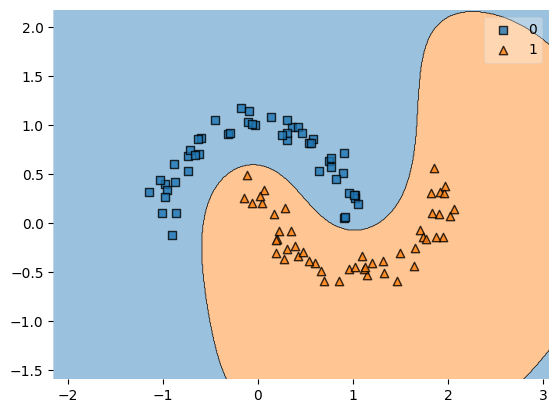

In [53]:
plot_decision_regions(X,y,svc)

 This result is due to the default RBF [`kernal`](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py). Radial basis functions (RBF) aka Gaussian kernal are functions centered at each point of our dataset
$$
a(x) = w_0 + w_1 K(x,x^{(1)}) +\ldots + w_N w_1 K(x,x^{(N)}),
$$
where
$$
K(x,a) = e^{-\gamma |x-a|^2}.
$$

**Problem 2. [3pt]** Use `kernal='linear'` and `C=1` in SVC. Plot desicion boundary and supporting vectors. Repeat for `C=0.2` and `C=5`.

*Hint:* 1) For the point on the support $|w_0+w_1x+w_2y|=1,$ this will help you to detect the support vectors (points on the support). `np.isclose(|w_0+w_1x+w_2y|, 1, atol=0.1)` may be useful, because of the numerical errors.  

2) The width of the margin is $2|w|.$ You'll need to plot two lines on the distance $|w|$ from the separator.


<Axes: >

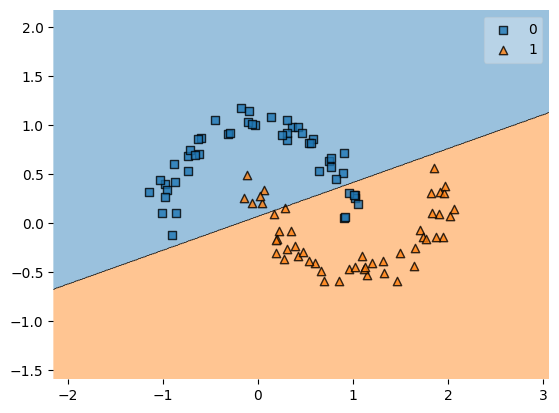

In [57]:
svc = SVC(kernel="linear").fit(X,y)
plot_decision_regions(X,y,svc)

SVC(C=1, kernel='linear')

<Axes: >

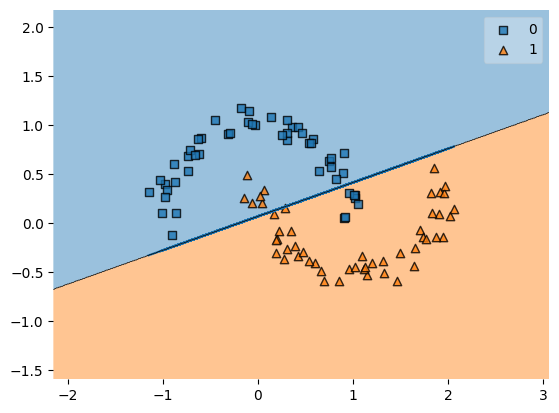

In [58]:
svc = SVC(kernel="linear").fit(X,y)
plt.plot(X[:,0], -(svc.intercept_+svc.coef_[0][0]*X[:,0])/svc.coef_[0][1])
plot_decision_regions(X,y,svc)

In [59]:
np.isclose(np.abs(svc.intercept_+svc.coef_[0][0]*X[:,0]+svc.coef_[0][1]*X[:,1]), 1, atol=0.1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [62]:
support = X[np.isclose(np.abs(svc.intercept_+svc.coef_[0][0]*X[:,0]+svc.coef_[0][1]*X[:,1]), 1, atol=0.1)]

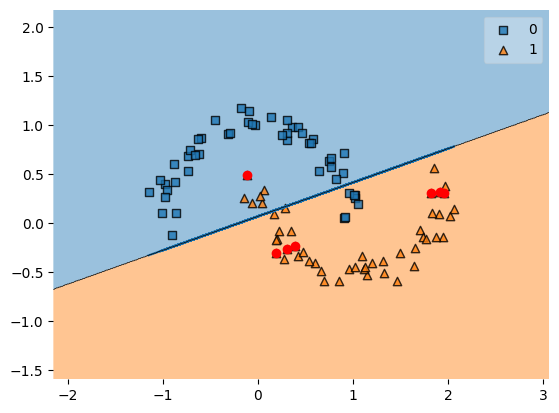

In [63]:
svc = SVC(kernel="linear").fit(X,y)
plt.plot(X[:,0], -(svc.intercept_+svc.coef_[0][0]*X[:,0])/svc.coef_[0][1])
plot_decision_regions(X,y,svc)
plt.scatter(support[:,0], support[:,1], color='red')

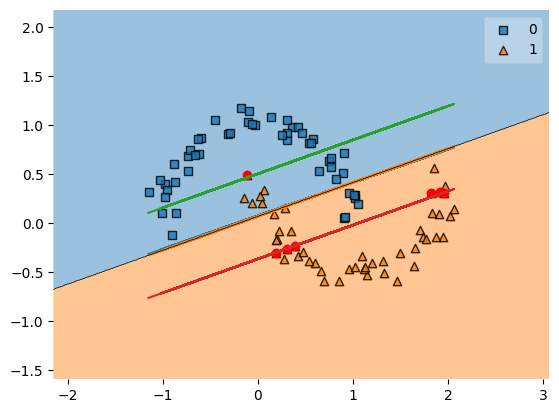

In [65]:
svc = SVC(kernel="linear").fit(X,y)
plt.plot(X[:,0], -(clf_LogReg.intercept_+clf_LogReg.coef_[0][0]*X[:,0])/clf_LogReg.coef_[0][1])
plt.plot(X[:,0], -(svc.intercept_+svc.coef_[0][0]*X[:,0])/svc.coef_[0][1])
plt.plot(X[:,0], -(1+svc.intercept_+svc.coef_[0][0]*X[:,0])/svc.coef_[0][1])
plt.plot(X[:,0], -(-1+svc.intercept_+svc.coef_[0][0]*X[:,0])/svc.coef_[0][1])
plot_decision_regions(X,y,svc)
plt.scatter(support[:,0], support[:,1], color='red')

<Axes: >

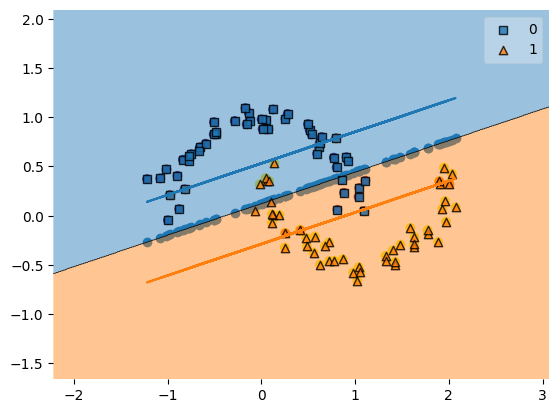

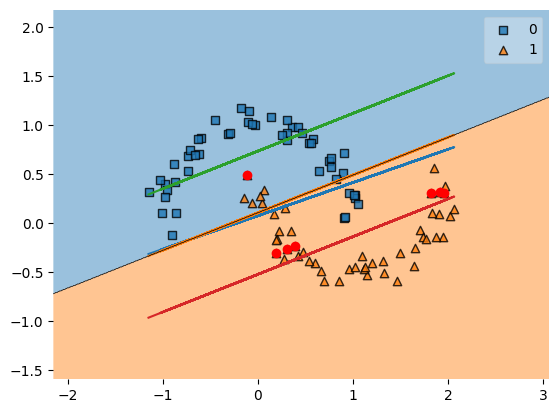

In [75]:
svc = SVC(C = 0.2, kernel="linear").fit(X,y)
plt.plot(X[:,0], -(clf_LogReg.intercept_+clf_LogReg.coef_[0][0]*X[:,0])/clf_LogReg.coef_[0][1])
plt.plot(X[:,0], -(svc.intercept_+svc.coef_[0][0]*X[:,0])/svc.coef_[0][1])
plt.plot(X[:,0], -(1+svc.intercept_+svc.coef_[0][0]*X[:,0])/svc.coef_[0][1])
plt.plot(X[:,0], -(-1+svc.intercept_+svc.coef_[0][0]*X[:,0])/svc.coef_[0][1])
plot_decision_regions(X,y,svc)
plt.scatter(support[:,0], support[:,1], color='red')

In [72]:
svc = SVC(kernel="linear", C=0.2, probability=True).fit(X,y)
svc.predict_proba(X)

array([[0.94660748, 0.05339252],
       [0.74101155, 0.25898845],
       [0.02550281, 0.97449719],
       [0.9883247 , 0.0116753 ],
       [0.96271212, 0.03728788],
       [0.09622687, 0.90377313],
       [0.44535616, 0.55464384],
       [0.04213853, 0.95786147],
       [0.02046202, 0.97953798],
       [0.18557572, 0.81442428],
       [0.92062745, 0.07937255],
       [0.45958941, 0.54041059],
       [0.97910643, 0.02089357],
       [0.10117247, 0.89882753],
       [0.02786135, 0.97213865],
       [0.96152251, 0.03847749],
       [0.88980235, 0.11019765],
       [0.05770344, 0.94229656],
       [0.88287754, 0.11712246],
       [0.0116829 , 0.9883171 ],
       [0.97362989, 0.02637011],
       [0.02217033, 0.97782967],
       [0.13489368, 0.86510632],
       [0.32433325, 0.67566675],
       [0.93438191, 0.06561809],
       [0.62462608, 0.37537392],
       [0.93971305, 0.06028695],
       [0.14300879, 0.85699121],
       [0.01669197, 0.98330803],
       [0.06641553, 0.93358447],
       [0.

# Logistic Regression as Probabilistic Model

If we take $\sigma$ of the margin as probability, then maximum likelihood estimation takes form
$$
\prod_{i=1}^{N} \frac{1}{1+e^{-y^{(i)}w^T x^{(i)}}} \to \underset{w}{\max}
$$
It is possible to prove that it is a real probability, i.e., it coinsides with fractions of positive samples in bins.

# Calibration of Models

In [67]:
clf_SVM = SVC(gamma='auto', probability=True)
clf_Log = LogisticRegression(C=1)

In [68]:
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
import matplotlib

In [69]:
clf_list = [
    (clf_Log, "Logistic"),
    (clf_SVM, "SVM"),
]

Text(0.5, 1.0, 'Calibration plots (Support Vector Machine)')

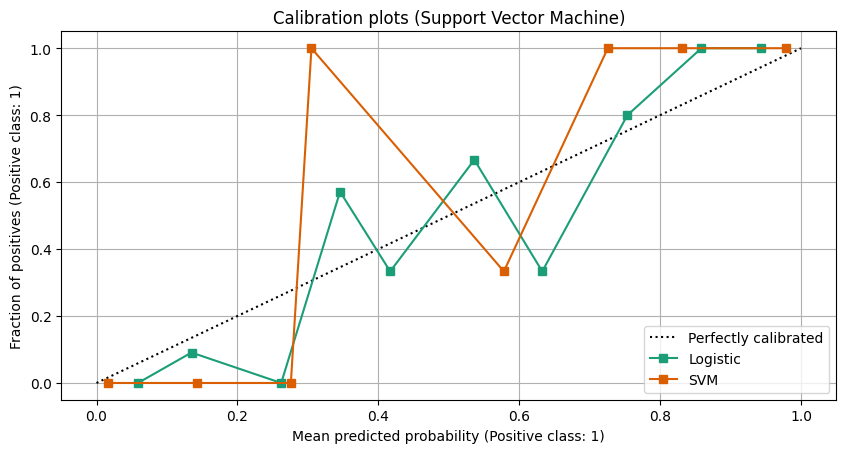

In [70]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = matplotlib.colormaps["Dark2"]

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X, y)
    display = CalibrationDisplay.from_estimator(
        clf,
        X,
        y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Support Vector Machine)")